### 1. Preparação do Ambiente

In [1]:
import os
import zipfile
import shutil

# 1. Baixar o ZIP do GitHub
ZIP_URL = "https://github.com/andrerizzo/CNN_para_Controle_de_Qualidade/archive/refs/heads/master.zip"
ZIPFILE = "/content/CNN.zip"

print("Baixando o dataset...")
!wget "$ZIP_URL" -O "$ZIPFILE"

# 2. Extrair o conteúdo
extract_path = "/content"

print("Extraindo arquivos...")
with zipfile.ZipFile(ZIPFILE, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# 3. Mover os arquivos da subpasta para /content
extracted_folder = os.path.join(extract_path, "CNN_para_Controle_de_Qualidade-master")

print("Movendo arquivos para a raiz do Colab...")
for item in os.listdir(extracted_folder):
    shutil.move(os.path.join(extracted_folder, item), extract_path)

# 4. Limpar: remover pasta intermediária e ZIP
print("Limpando arquivos temporários...")
shutil.rmtree(extracted_folder)
os.remove(ZIPFILE)

print("Processo finalizado com sucesso!")


Baixando o dataset...
--2025-04-04 14:50:44--  https://github.com/andrerizzo/CNN_para_Controle_de_Qualidade/archive/refs/heads/master.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/andrerizzo/CNN_para_Controle_de_Qualidade/zip/refs/heads/master [following]
--2025-04-04 14:50:44--  https://codeload.github.com/andrerizzo/CNN_para_Controle_de_Qualidade/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/content/CNN.zip’

/content/CNN.zip        [    <=>             ]   1.42M  2.10MB/s    in 0.7s    

2025-04-04 14:50:45 (2.10 MB/s) - ‘/content/CNN.zip’ saved [1491205]

Extraindo arquivos...
Movendo 

### 2. Importar bibliotecas necessárias

In [2]:
from src.data_acquisition import download_and_extract_dataset, organize_images
from src.preprocess import train_val_test_generators, get_data_augmentation_pipeline, apply_data_augmentation
from src.preprocess import vgg16_pre_processing, resnet50_pre_processing
from src.build_model import build_model_vgg16 , compile_model_vgg16, build_model_resnet50, compile_model_resnet50
from src.build_model import build_model_vgg16_v2, build_model_resnet50_v2
from src.train_model import train_model
from src.evaluate_model import plot_training_history, performance_metrics

#### 2.1. Definição de Variáveis

In [3]:
# Google Colab
DOWNLOAD_PATH = '/content'
EXTRACT_PATH = '/content/data/images'
IMAGE_PATH='/content/data/images'

# Local
#DOWNLOAD_PATH = r'C:\Users\andre\teste'
#EXTRACT_PATH = r'C:\Users\andre\teste\images'
#IMAGE_PATH= r'C:\Users\andre\teste\images'

### 3. Download e Preparação das Imagens

In [ ]:
# Download from Google Drive
URL = 'https://drive.google.com/uc?id=1mJP89sYYwTO1M_nCu9_0tMtx62_h6hw8'
download_and_extract_dataset(gdrive_url=URL,
                                    download_path=DOWNLOAD_PATH,
                                    extract_path=EXTRACT_PATH
                                    )


# Organizar imagens
organize_images(extract_path=EXTRACT_PATH)


### 4. Criação dos Datasets de Treino, Validação e Teste com Realização de Data Augmentation

In [5]:
IMAGE_SIZE=(224,224)
BATCH_SIZE=32
VALIDATION_SPLIT=0.1
TEST_SPLIT=0.2


# Carrega datasets de treino, validação e teste
train_img, val_img, test_img, nome_classes = train_val_test_generators(img_path=IMAGE_PATH,
                                                         img_size=IMAGE_SIZE,
                                                         bt_size=BATCH_SIZE,
                                                         val_split=VALIDATION_SPLIT,
                                                         test_split=TEST_SPLIT
                                                         )


# Aplica data augmentation apenas no treino
aug_layer = get_data_augmentation_pipeline()
train_img = apply_data_augmentation(train_img, aug_layer)

Found 7224 files belonging to 4 classes.


---

<br>

### 5. Modelo VGG16

#### 5.1. Pre-processamento (parte 2) - Normalização Específica para Modelo VGG16

In [ ]:
# Aplica pre-processamento específico do modelo VGG16
train_img_vgg16, val_img_vgg16, test_img_vgg16 = vgg16_pre_processing(train_ds=train_img,
                                                    val_ds=val_img,
                                                    test_ds=test_img)

print(f'Classes: :{nome_classes}')

Classes: :['Danificados', 'Maduros', 'Velhos', 'Verdes']


In [ ]:
for images, labels in train_img_vgg16.take(1):
    print(images.shape, labels.shape)

(32, 224, 224, 3) (32, 4)


#### 5.2. Criação e Compilação do Modelo com Transfer Learning (VGG16)

In [ ]:
model_vgg16 = build_model_vgg16(input_shape=(224,224,3), num_classes=4)
model_vgg16 = compile_model_vgg16(model=model_vgg16, learning_rate=0.0001)
model_vgg16.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,138,500 (80.64 MB)

 Trainable params: 6,423,812 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

#### 5.3. Treinamento do Modelo Baseado em VGG16

In [ ]:
history_vgg16 = train_model(model=model_vgg16,
                      train_images=train_img_vgg16,
                      val_images=val_img_vgg16,
                      output_dir='content/models',
                      model_file_name='model_vgg16.keras',
                      epochs=20,
                      patience=5)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6621 - loss: 0.9308
Epoch 1: val_accuracy improved from -inf to 0.91319, saving model to content/models/model_vgg16.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 16s 57ms/step - accuracy: 0.6629 - loss: 0.9284 - val_accuracy: 0.9132 - val_loss: 0.2120 - learning_rate: 1.0000e-04
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9094 - loss: 0.1743
Epoch 2: val_accuracy improved from 0.91319 to 0.94965, saving model to content/models/model_vgg16.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9094 - loss: 0.1743 - val_accuracy: 0.9497 - val_loss: 0.0883 - learning_rate: 1.0000e-04
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9151 - loss: 0.1115
Epoch 3: val_accuracy did not improve from 0.94965
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9152 - loss: 0.1114 - val_accuracy: 0.9479 - val_loss: 0.0598 - learning_rate: 1.0000e-04
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s

#### 5.4. Avaliação do Modelo VGG16

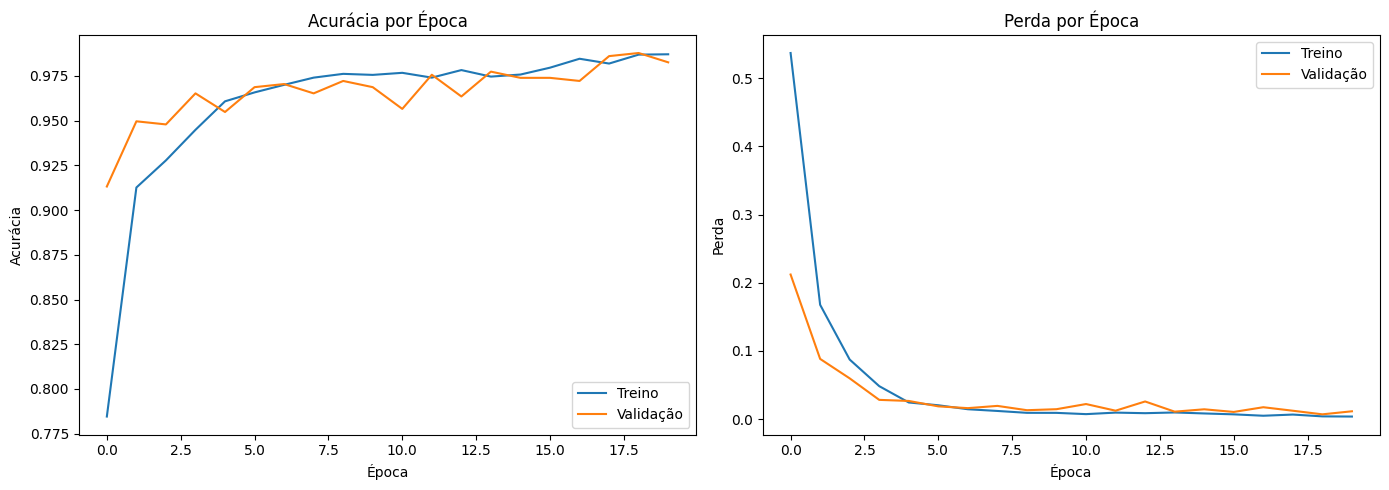


Relatório de Classificação:
              precision    recall  f1-score   support

 Danificados       0.97      0.92      0.94       218
     Maduros       0.98      1.00      0.99       446
      Velhos       0.97      0.98      0.97       430
      Verdes       0.99      0.98      0.98       346

    accuracy                           0.98      1440
   macro avg       0.98      0.97      0.97      1440
weighted avg       0.98      0.98      0.98      1440



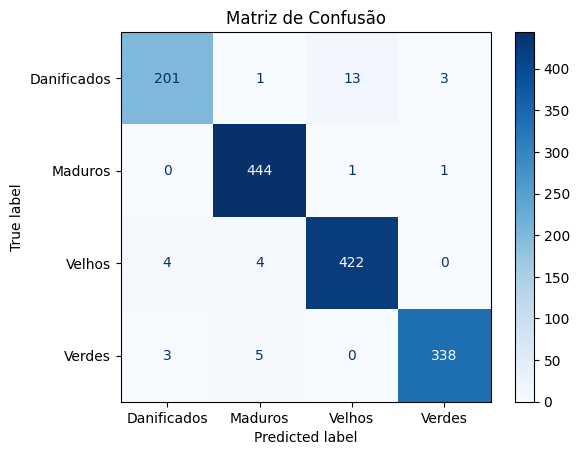

In [ ]:
plot_training_history(history=history_vgg16)
performance_metrics(model=model_vgg16,
                    test_dataset=test_img,
                    class_names=nome_classes
                    )

---

<br>

### 6. Modelo ResNet50

#### 6.1. Pre-processamento (parte 2) - Normalização Específica para Modelo ResNet50

In [ ]:
train_img_resnet50, val_img_resnet50, test_img_resnet50 = resnet50_pre_processing(train_ds=train_img,
                                                                               val_ds=val_img,
                                                                               test_ds=test_img)

print(f'Classes: :{nome_classes}')

Classes: :['Danificados', 'Maduros', 'Velhos', 'Verdes']


In [ ]:
for images, labels in train_img_resnet50.take(1):
    print(images.shape, labels.shape)

(32, 224, 224, 3) (32, 4)


#### 6.2. Criação e Compilação do Modelo com Transfer Learning (ResNet50)

In [ ]:
model_resnet50 = build_model_resnet50(input_shape=(224,224,3), num_classes=4)
model_resnet50 = compile_model_resnet50(model=model_resnet50, learning_rate=0.0001)
model_resnet50.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 49,279,108 (187.98 MB)

 Trainable params: 25,691,396 (98.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

#### 6.3. Treinamento do Modelo Baseado em ResNet50

In [ ]:
history_resnet50 = train_model(model=model_resnet50,
                      train_images=train_img_resnet50,
                      val_images=val_img_resnet50,
                      output_dir='content/models',
                      model_file_name='model_resnet50.keras',
                      epochs=20,
                      patience=5)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.7448 - loss: 0.2945
Epoch 1: val_accuracy improved from -inf to 0.94271, saving model to content/models/model_resnet50.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 86s 448ms/step - accuracy: 0.7453 - loss: 0.2936 - val_accuracy: 0.9427 - val_loss: 0.0123 - learning_rate: 1.0000e-04
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.8913 - loss: 0.0309
Epoch 2: val_accuracy did not improve from 0.94271
163/163 ━━━━━━━━━━━━━━━━━━━━ 66s 405ms/step - accuracy: 0.8913 - loss: 0.0309 - val_accuracy: 0.9340 - val_loss: 0.0139 - learning_rate: 1.0000e-04
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.8876 - loss: 0.0339
Epoch 3: val_accuracy did not improve from 0.94271
163/163 ━━━━━━━━━━━━━━━━━━━━ 66s 404ms/step - accuracy: 0.8877 - loss: 0.0339 - val_accuracy: 0.9427 - val_loss: 0.0126 - learning_rate: 1.0000e-04
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.9073 - loss: 0.02

#### 6.4. Avaliação do Modelo ResNet50

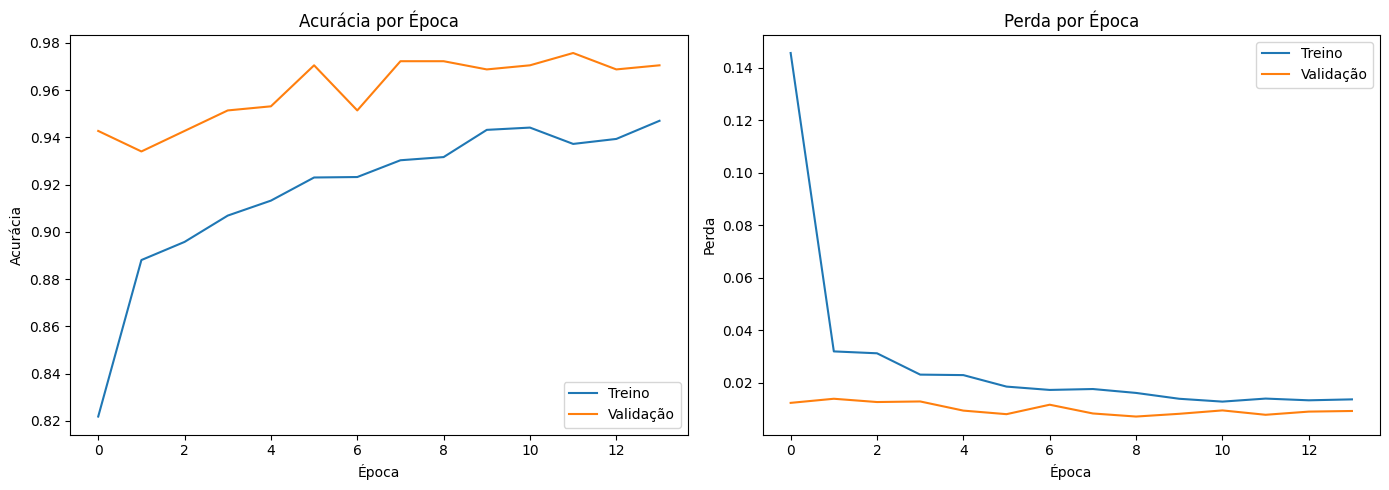


Relatório de Classificação:
              precision    recall  f1-score   support

 Danificados       0.95      0.85      0.90       211
     Maduros       0.98      0.99      0.99       443
      Velhos       0.94      0.97      0.96       438
      Verdes       0.98      0.99      0.98       348

    accuracy                           0.96      1440
   macro avg       0.96      0.95      0.96      1440
weighted avg       0.96      0.96      0.96      1440



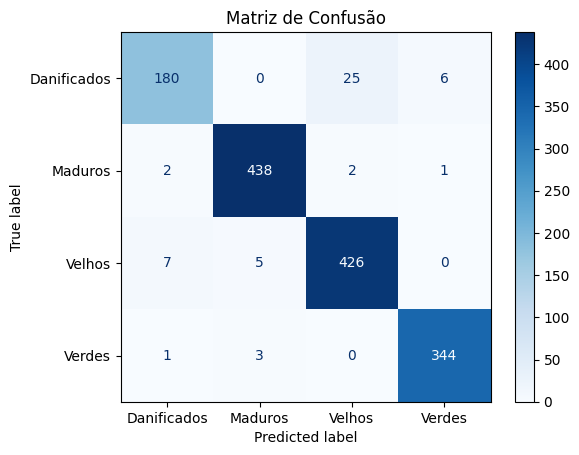

In [ ]:
plot_training_history(history=history_resnet50)
performance_metrics(model=model_resnet50,
                    test_dataset=test_img_resnet50,
                    class_names=nome_classes
                    )

---

<br>

### 7. Modelo VGG16 versão 2

Nesta versão foram realizadas as seguintes customizações:
- 20 camadas convolucionais descongeladas
- Demais camadas convolucionais utilizando os pesos originais.

#### 7.1. Pre-processamento (parte 2) - Normalização Específica para Modelo VGG16 v2

In [ ]:
# Aplica pre-processamento específico do modelo VGG16
train_img_vgg16, val_img_vgg16, test_img_vgg16 = vgg16_pre_processing(train_ds=train_img,
                                                    val_ds=val_img,
                                                    test_ds=test_img)

print(f'Classes: :{nome_classes}')

Classes: :['Danificados', 'Maduros', 'Velhos', 'Verdes']


In [ ]:
for images, labels in train_img_vgg16.take(1):
    print(images.shape, labels.shape)

(32, 224, 224, 3) (32, 4)


#### 7.2. Criação e Compilação do Modelo com Transfer Learning (VGG16)

In [ ]:
model_vgg16_v2 = build_model_vgg16_v2(input_shape=(224,224,3), num_classes=4)
model_vgg16_v2 = compile_model_vgg16(model=model_vgg16_v2, learning_rate=0.0001)
model_vgg16_v2.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,138,500 (80.64 MB)

 Trainable params: 21,138,500 (80.64 MB)

 Non-trainable params: 0 (0.00 B)

#### 7.3. Treinamento do Modelo Baseado em VGG16 v2

In [ ]:
history_vgg16_v2 = train_model(model=model_vgg16_v2,
                               train_images=train_img_vgg16,
                               val_images=val_img_vgg16,
                               output_dir='models',
                               model_file_name='model_vgg16_v2b.keras',
                               epochs=20,
                               patience=5,
                               min_lr_ROP=0.00001,
                               factorROP=0.5,
                               patienceROP=3
                               )

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.5145 - loss: 0.3891
Epoch 1: val_accuracy improved from -inf to 0.81250, saving model to models/model_vgg16_v2b.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 95s 473ms/step - accuracy: 0.5154 - loss: 0.3876 - val_accuracy: 0.8125 - val_loss: 0.0506 - learning_rate: 1.0000e-04
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.8514 - loss: 0.0355
Epoch 2: val_accuracy improved from 0.81250 to 0.91667, saving model to models/model_vgg16_v2b.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 409ms/step - accuracy: 0.8515 - loss: 0.0355 - val_accuracy: 0.9167 - val_loss: 0.0209 - learning_rate: 1.0000e-04
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.9040 - loss: 0.0231
Epoch 3: val_accuracy did not improve from 0.91667
163/163 ━━━━━━━━━━━━━━━━━━━━ 66s 404ms/step - accuracy: 0.9040 - loss: 0.0231 - val_accuracy: 0.9080 - val_loss: 0.0196 - learning_rate: 1.0000e-04
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s

#### 7.4. Avaliação do Modelo VGG16 v2

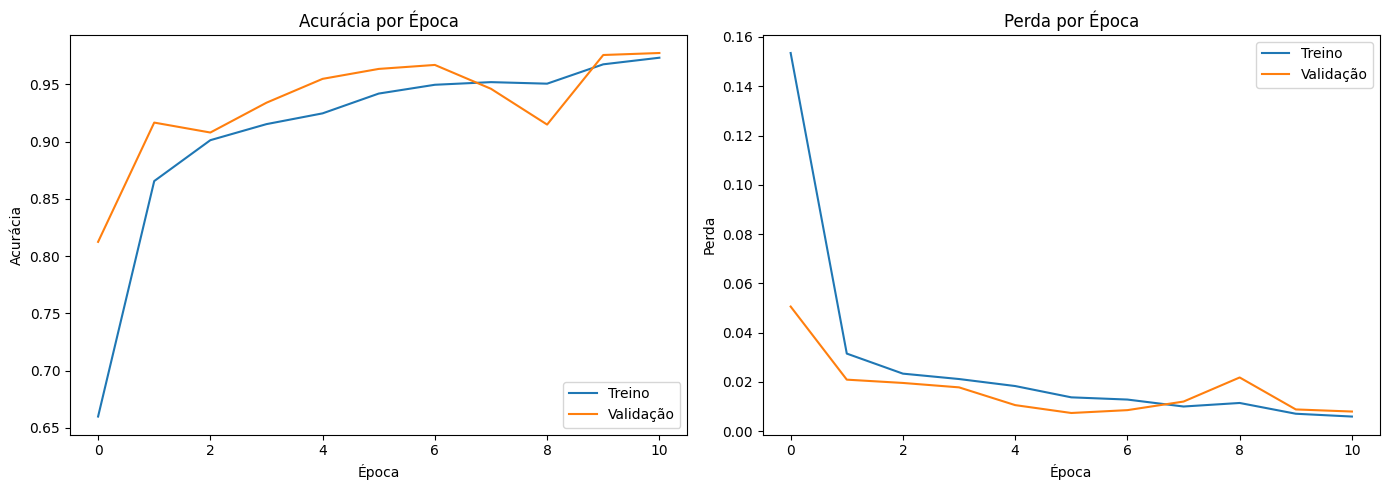


Relatório de Classificação:
              precision    recall  f1-score   support

 Danificados       0.95      0.88      0.91       221
     Maduros       0.98      0.99      0.98       449
      Velhos       0.94      0.97      0.95       429
      Verdes       0.98      0.99      0.99       341

    accuracy                           0.97      1440
   macro avg       0.96      0.96      0.96      1440
weighted avg       0.97      0.97      0.96      1440



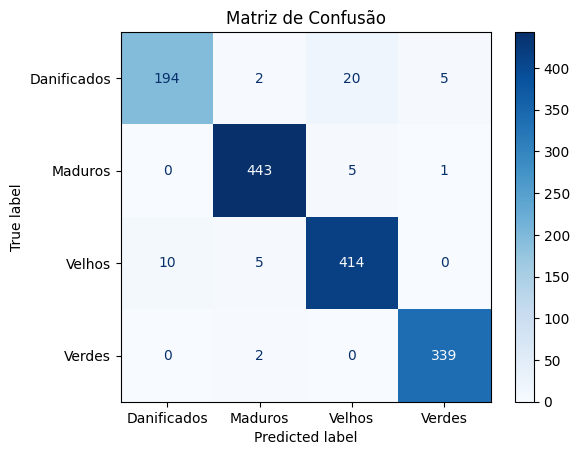

In [ ]:
plot_training_history(history=history_vgg16_v2)
performance_metrics(model=model_vgg16_v2,
                    test_dataset=test_img_vgg16,
                    class_names=nome_classes
                    )

---

<br>

### 8. Modelo ResNet50 v2

#### 8.1. Pre-processamento (parte 2) - Normalização Específica para Modelo ResNet50v2

In [6]:
train_img_resnet50, val_img_resnet50, test_img_resnet50 = resnet50_pre_processing(train_ds=train_img,
                                                                               val_ds=val_img,
                                                                               test_ds=test_img)

print(f'Classes: :{nome_classes}')

Classes: :['Danificados', 'Maduros', 'Velhos', 'Verdes']


In [7]:
for images, labels in train_img_resnet50.take(1):
    print(images.shape, labels.shape)

(32, 224, 224, 3) (32, 4)


#### 8.2. Criação e Compilação do Modelo com Transfer Learning (ResNet50)

In [8]:
model_resnet50_v2 = build_model_resnet50_v2(input_shape=(224,224,3), num_classes=4)
model_resnet50_v2 = compile_model_vgg16(model=model_resnet50_v2, learning_rate=0.0001)
model_resnet50_v2.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 49,279,108 (187.98 MB)

 Trainable params: 49,225,988 (187.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

#### 8.3. Treinamento do Modelo Baseado em ResNet50 v2

In [9]:
history_resnet50_v2 = train_model(model=model_resnet50_v2,
                               train_images=train_img_resnet50,
                               val_images=val_img_resnet50,
                               output_dir='models',
                               model_file_name='model_resnet50_v2.keras',
                               epochs=20,
                               patience=5,
                               min_lr_ROP=0.00001,
                               factorROP=0.5,
                               patienceROP=3
                               )

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.7579 - loss: 0.2588
Epoch 1: val_accuracy improved from -inf to 0.93403, saving model to models/model_resnet50_v2.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 148s 559ms/step - accuracy: 0.7585 - loss: 0.2578 - val_accuracy: 0.9340 - val_loss: 0.0181 - learning_rate: 1.0000e-04
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.9300 - loss: 0.0182
Epoch 2: val_accuracy did not improve from 0.93403
163/163 ━━━━━━━━━━━━━━━━━━━━ 66s 404ms/step - accuracy: 0.9300 - loss: 0.0182 - val_accuracy: 0.9323 - val_loss: 0.0174 - learning_rate: 1.0000e-04
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.9469 - loss: 0.0140
Epoch 3: val_accuracy improved from 0.93403 to 0.96181, saving model to models/model_resnet50_v2.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 419ms/step - accuracy: 0.9469 - loss: 0.0140 - val_accuracy: 0.9618 - val_loss: 0.0078 - learning_rate: 1.0000e-04
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━

#### 8.4. Avaliação do Modelo ResNet50 v2

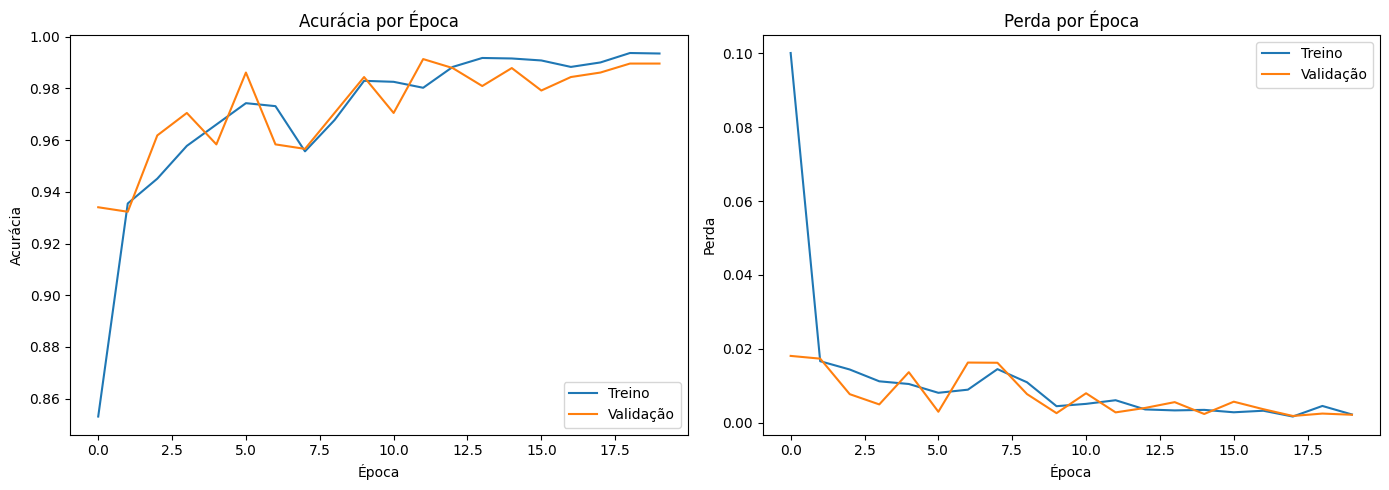


Relatório de Classificação:
              precision    recall  f1-score   support

 Danificados       0.97      0.99      0.98       225
     Maduros       1.00      1.00      1.00       434
      Velhos       1.00      0.99      0.99       438
      Verdes       0.99      0.99      0.99       343

    accuracy                           0.99      1440
   macro avg       0.99      0.99      0.99      1440
weighted avg       0.99      0.99      0.99      1440



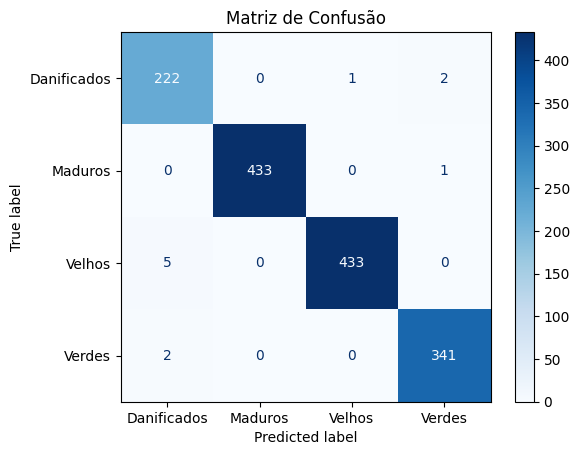

In [10]:
plot_training_history(history=history_resnet50_v2)
performance_metrics(model=model_resnet50_v2,
                    test_dataset=test_img_resnet50,
                    class_names=nome_classes
                    )